In [65]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:

# Load your data from CSV file (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('species.csv')


C:\Users\am737\AppData\Local\Temp\ipykernel_13532\3053673837.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('species.csv')


In [69]:
data.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [70]:
data.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [97]:

# Select relevant columns for analysis (optional)
relevant_columns = ['Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Occurrence',
       'Nativeness', 'Conservation Status']
data = data[relevant_columns]


In [98]:

# Handle missing values (optional)
# You can replace with other methods like filling with mode or median
data.replace('Unknown', np.nan, inplace=True)
data.dropna(inplace=True)


In [99]:

# Encode categorical data using one-hot encoding
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(data.values)


In [100]:
# Convert encoded_data to a pandas DataFrame
data_df = pd.DataFrame(encoded_data, columns=encoder.columns_)


In [101]:

# Define minimum support threshold (adjust as needed)
min_support = 0.5


In [102]:

# Apriori Algorithm

# Frequent itemset generation
frequent_itemsets_apriori = apriori(data_df, min_support=min_support, use_colnames=True)

In [103]:

# Print frequent itemsets
print("Frequent Itemsets (Apriori):")
print(frequent_itemsets_apriori)


Frequent Itemsets (Apriori):
     support                                     itemsets
0   0.797107                                       (Bird)
1   0.978099                                     (Native)
2   1.000000                                    (Present)
3   0.880165                         (Species of Concern)
4   0.780165                               (Bird, Native)
5   0.797107                              (Bird, Present)
6   0.732231                   (Bird, Species of Concern)
7   0.978099                            (Present, Native)
8   0.866529                 (Native, Species of Concern)
9   0.880165                (Present, Species of Concern)
10  0.780165                      (Bird, Present, Native)
11  0.719421           (Bird, Native, Species of Concern)
12  0.732231          (Bird, Present, Species of Concern)
13  0.866529        (Present, Native, Species of Concern)
14  0.719421  (Bird, Present, Native, Species of Concern)


In [104]:
# association rule generation
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.7)

# Print association rules
print("Association Rules (Apriori):")
print(rules_apriori)

Association Rules (Apriori):
                              antecedents  \
0                                  (Bird)   
1                                (Native)   
2                                  (Bird)   
3                               (Present)   
4                                  (Bird)   
5                    (Species of Concern)   
6                               (Present)   
7                                (Native)   
8                                (Native)   
9                    (Species of Concern)   
10                              (Present)   
11                   (Species of Concern)   
12                        (Bird, Present)   
13                         (Bird, Native)   
14                      (Present, Native)   
15                                 (Bird)   
16                              (Present)   
17                               (Native)   
18                         (Bird, Native)   
19             (Bird, Species of Concern)   
20           (Native, Spec

In [ ]:


# Assuming you have your association rules stored in a variable named 'association_rules'

# Extract support and confidence values from the rules
supports = rules_fpgrowth['support'].tolist()
confidences = rules_fpgrowth['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()

# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=rules_fpgrowth.antecedents, y=supports)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()

# (Optional) Heatmap for lift values (if available in your association_rules)
if 'lift' in rules_fpgrowth.columns:
  # Create a pivot table
  pivot_table = rules_fpgrowth.pivot(index='antecedents', columns='consequents', values='lift')

  # Heatmap for lift values
  plt.figure(figsize=(8, 6))
  sns.heatmap(pivot_table, annot=True, fmt=".2f")
  plt.title('Lift Values of Association Rules')
  plt.show()


In [105]:

# FP-Growth Algorithm

# Frequent pattern mining
frequent_itemsets_fpgrowth = fpgrowth(data_df, min_support=min_support,  use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fpgrowth)


Frequent Itemsets (FP-Growth):
     support                                     itemsets
0   1.000000                                    (Present)
1   0.978099                                     (Native)
2   0.880165                         (Species of Concern)
3   0.797107                                       (Bird)
4   0.978099                            (Present, Native)
5   0.880165                (Present, Species of Concern)
6   0.866529                 (Native, Species of Concern)
7   0.866529        (Present, Native, Species of Concern)
8   0.797107                              (Bird, Present)
9   0.780165                               (Bird, Native)
10  0.732231                   (Bird, Species of Concern)
11  0.780165                      (Bird, Present, Native)
12  0.732231          (Bird, Present, Species of Concern)
13  0.719421           (Bird, Native, Species of Concern)
14  0.719421  (Bird, Present, Native, Species of Concern)


In [106]:
# Generate association rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)

# Print association rules
print("Association Rules (FP-Growth):")
print(rules_fpgrowth)

Association Rules (FP-Growth):
                              antecedents  \
0                               (Present)   
1                                (Native)   
2                               (Present)   
3                    (Species of Concern)   
4                                (Native)   
5                    (Species of Concern)   
6                       (Present, Native)   
7           (Present, Species of Concern)   
8            (Native, Species of Concern)   
9                               (Present)   
10                               (Native)   
11                   (Species of Concern)   
12                                 (Bird)   
13                              (Present)   
14                                 (Bird)   
15                               (Native)   
16                                 (Bird)   
17                   (Species of Concern)   
18                        (Bird, Present)   
19                         (Bird, Native)   
20                      

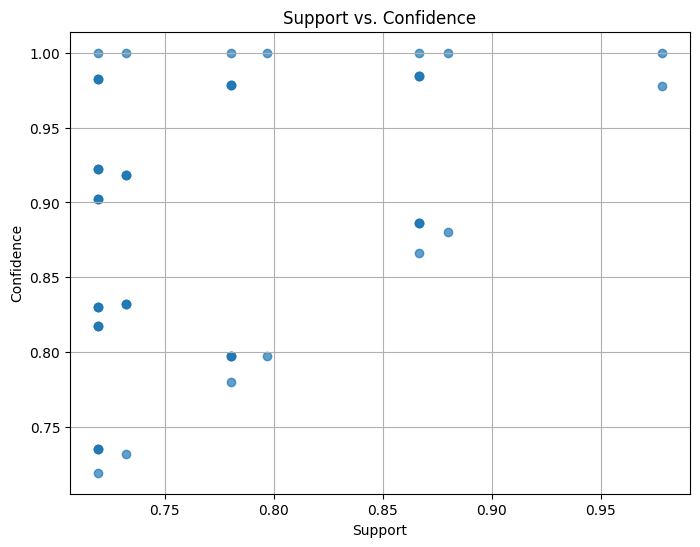

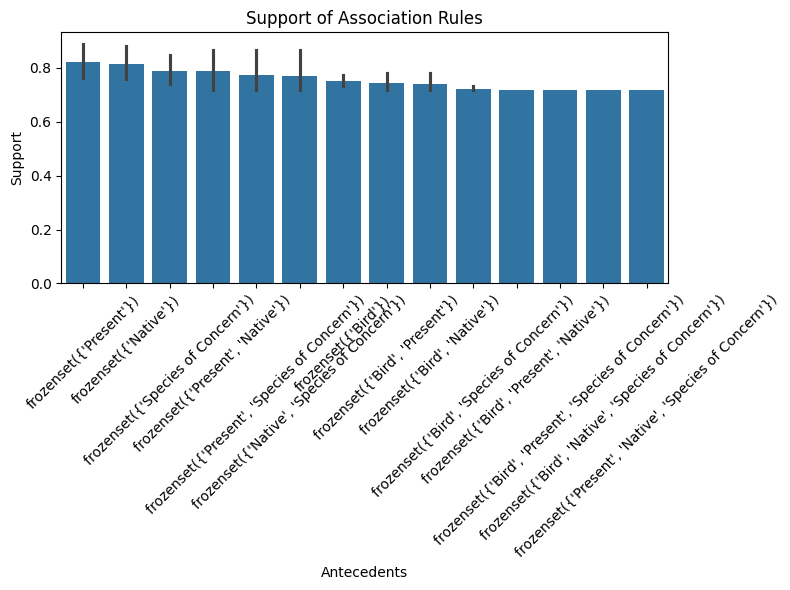

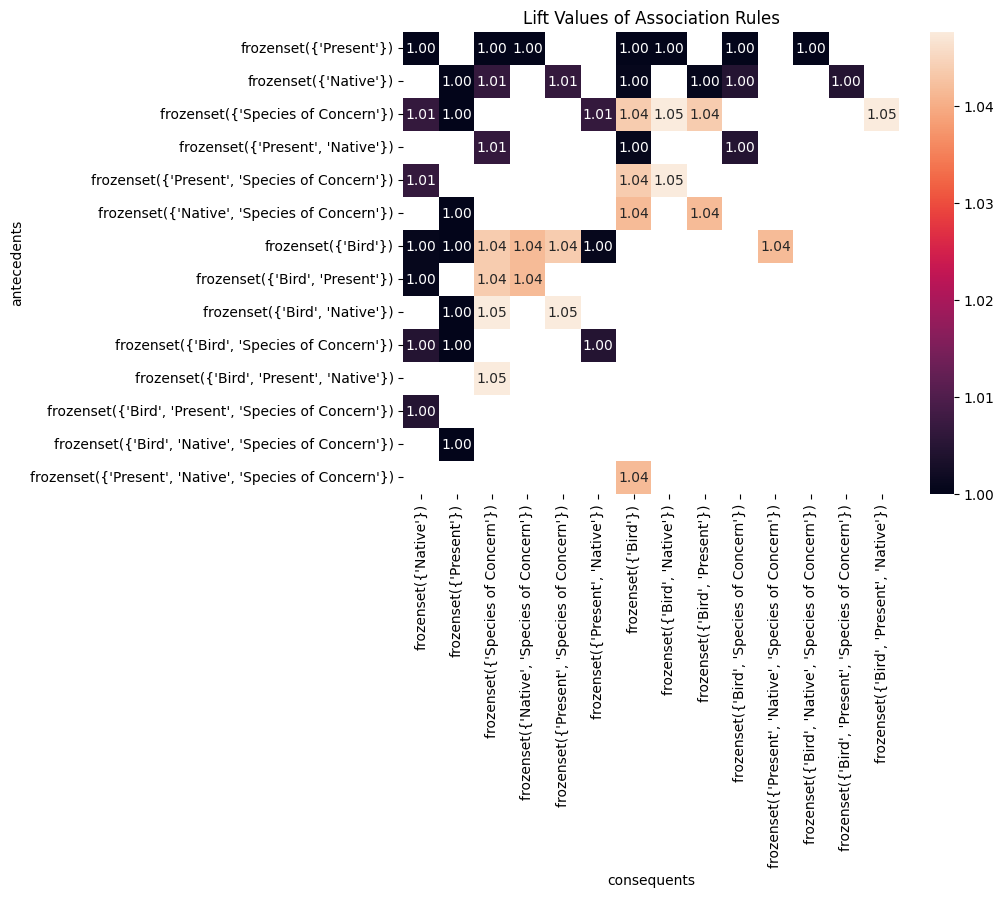

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your association rules stored in a variable named 'association_rules'

# Extract support and confidence values from the rules
supports = rules_fpgrowth['support'].tolist()
confidences = rules_fpgrowth['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()

# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=rules_fpgrowth.antecedents, y=supports)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()

# (Optional) Heatmap for lift values (if available in your association_rules)
if 'lift' in rules_fpgrowth.columns:
  # Create a pivot table
  pivot_table = rules_fpgrowth.pivot(index='antecedents', columns='consequents', values='lift')

  # Heatmap for lift values
  plt.figure(figsize=(8, 6))
  sns.heatmap(pivot_table, annot=True, fmt=".2f")
  plt.title('Lift Values of Association Rules')
  plt.show()
